# TSQVT ρ-Higgs Portal: Benchmark Analysis

**Notebook 02:** Detailed analysis of benchmark points B1, B2, B3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src')

from tsqvt_pipeline import TSQVTParameters, compute_benchmark
from branching_ratios import compute_branching_ratios
from cross_sections import compute_total_xsec

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 120

## 1. Define Benchmarks

In [2]:
benchmarks = [
    {'name': 'B1', 'Lambda': 1590, 'm_rho': 2260},
    {'name': 'B2', 'Lambda': 1500, 'm_rho': 2260},
    {'name': 'B3', 'Lambda': 1680, 'm_rho': 2440},
]

params = TSQVTParameters()
print(f"Using spectral parameters: α₁ = {params.alpha1:.4e}, κ_spec = {params.kappa_spec:.2e}")

Using spectral parameters: α₁ = 4.2750e-02, κ_spec = 5.00e+04


## 2. Compute Benchmark Observables

In [3]:
results = []

for bm in benchmarks:
    result = compute_benchmark(bm['Lambda'], bm['m_rho'], bm['name'], params)
    results.append(result)
    
    print(f"\n{bm['name']}: Λ = {bm['Lambda']} GeV, m_ρ = {bm['m_rho']} GeV")
    print(f"  θ = {result['theta_deg']:.2f}°")
    print(f"  Δκ = {result['Delta_kappa_percent']:.2f}%")
    print(f"  σ_ggF = {result['sigma_ggF']*1000:.2f} fb")
    print(f"  σ_VBF = {result['sigma_VBF']*1000:.2f} fb")
    print(f"  σ_tot = {result['sigma_tot']*1000:.2f} fb")
    print(f"  σ×BR(WW) = {result['sigma_x_BR_WW']:.2f} fb")
    print(f"  R_VBF/ggF = {result['R_VBF_ggF']:.1f}")


B1: Λ = 1590 GeV, m_ρ = 2260 GeV
  θ = -11.08°
  Δκ = -1.87%
  σ_ggF = 0.31 fb
  σ_VBF = 3.11 fb
  σ_tot = 3.42 fb
  σ×BR(WW) = 2.24 fb
  R_VBF/ggF = 9.9

B2: Λ = 1500 GeV, m_ρ = 2260 GeV
  θ = -9.97°
  Δκ = -1.51%
  σ_ggF = 0.25 fb
  σ_VBF = 3.11 fb
  σ_tot = 3.36 fb
  σ×BR(WW) = 2.20 fb
  R_VBF/ggF = 12.3

B3: Λ = 1680 GeV, m_ρ = 2440 GeV
  θ = -10.65°
  Δκ = -1.72%
  σ_ggF = 0.23 fb
  σ_VBF = 2.67 fb
  σ_tot = 2.90 fb
  σ×BR(WW) = 1.90 fb
  R_VBF/ggF = 11.6


## 3. Branching Ratios

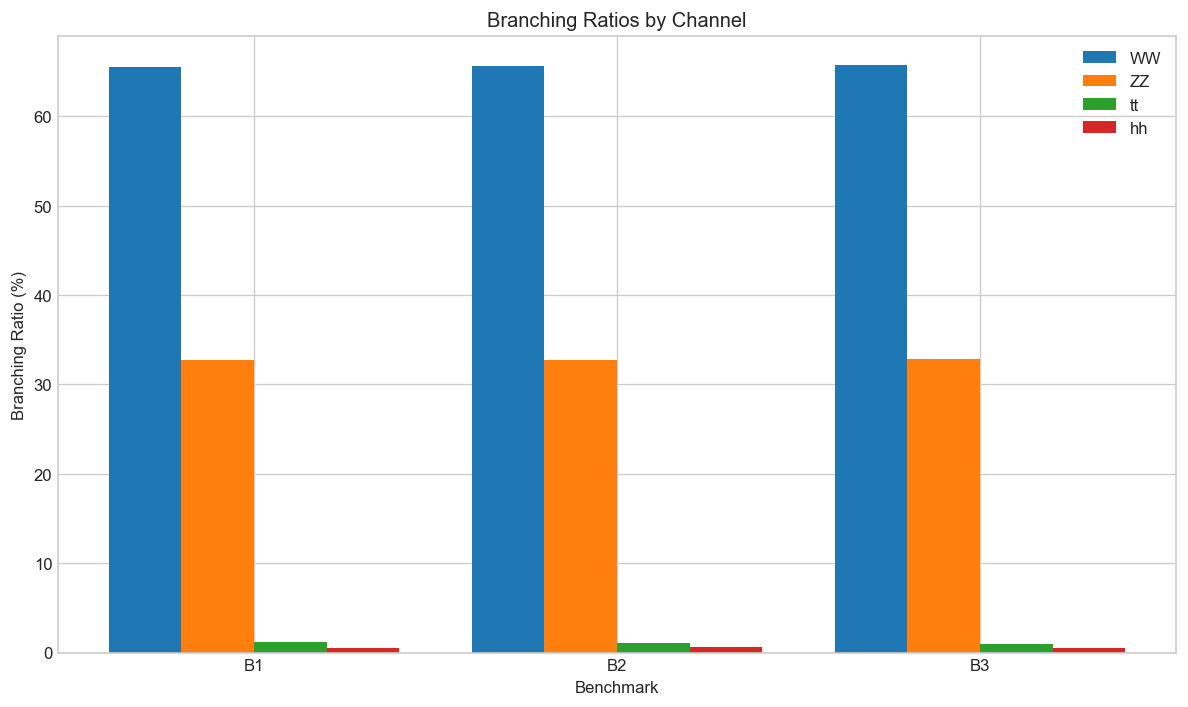

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

channels = ['WW', 'ZZ', 'tt', 'hh']
x = np.arange(len(benchmarks))
width = 0.2

for i, ch in enumerate(channels):
    brs = [r['BR'].get(ch, 0) * 100 for r in results]
    ax.bar(x + i*width, brs, width, label=ch)

ax.set_xlabel('Benchmark')
ax.set_ylabel('Branching Ratio (%)')
ax.set_xticks(x + 1.5*width)
ax.set_xticklabels([bm['name'] for bm in benchmarks])
ax.legend()
ax.set_title('Branching Ratios by Channel')
plt.tight_layout()
plt.show()

## 4. Production Mode Comparison

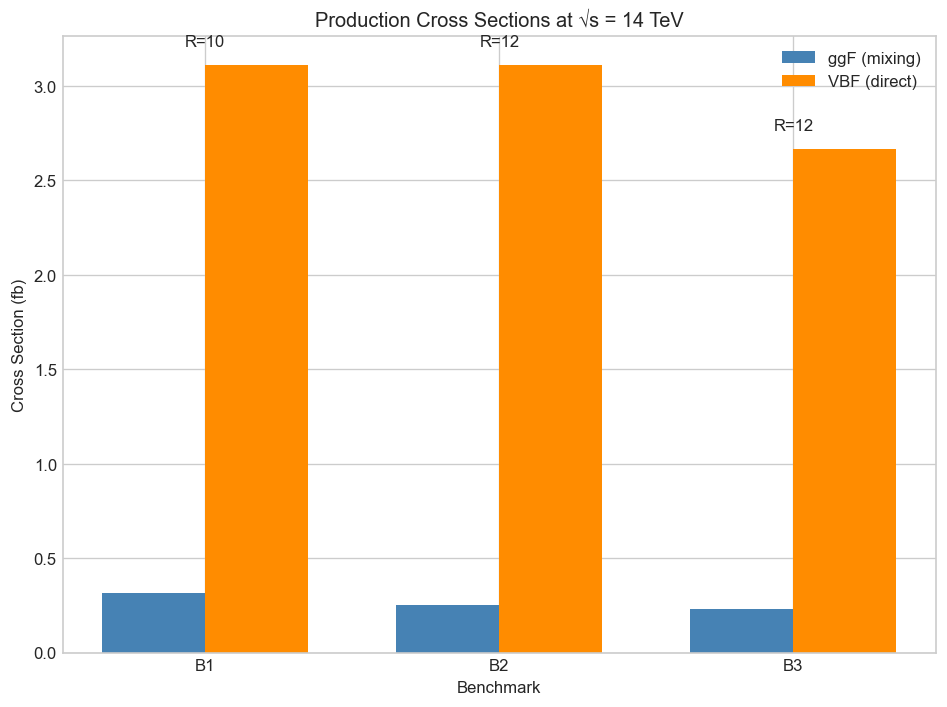

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

sigma_ggF = [r['sigma_ggF']*1000 for r in results]
sigma_VBF = [r['sigma_VBF']*1000 for r in results]

x = np.arange(len(benchmarks))
width = 0.35

ax.bar(x - width/2, sigma_ggF, width, label='ggF (mixing)', color='steelblue')
ax.bar(x + width/2, sigma_VBF, width, label='VBF (direct)', color='darkorange')

ax.set_xlabel('Benchmark')
ax.set_ylabel('Cross Section (fb)')
ax.set_xticks(x)
ax.set_xticklabels([bm['name'] for bm in benchmarks])
ax.legend()
ax.set_title('Production Cross Sections at √s = 14 TeV')

for i, (ggf, vbf) in enumerate(zip(sigma_ggF, sigma_VBF)):
    ratio = vbf/ggf if ggf > 0 else np.inf
    ax.text(i, max(ggf, vbf) + 0.1, f'R={ratio:.0f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## 5. Create Summary Table

In [7]:
summary = pd.DataFrame({
    'Benchmark': [r['name'] for r in results],
    'Λ (TeV)': [r['Lambda']/1000 for r in results],
    'm_ρ (TeV)': [r['m_rho']/1000 for r in results],
    'θ (deg)': [r['theta_deg'] for r in results],
    'Δκ (%)': [r['Delta_kappa_percent'] for r in results],
    'σ_ggF (fb)': [r['sigma_ggF']*1000 for r in results],
    'σ_VBF (fb)': [r['sigma_VBF']*1000 for r in results],
    'σ×BR(WW) (fb)': [r['sigma_x_BR_WW'] for r in results],
    'R_VBF/ggF': [r['R_VBF_ggF'] for r in results],
})

print(summary.to_string(index=False))
summary.to_csv('../data/benchmark_outputs.csv', index=False)

Benchmark  Λ (TeV)  m_ρ (TeV)    θ (deg)    Δκ (%)  σ_ggF (fb)  σ_VBF (fb)  σ×BR(WW) (fb)  R_VBF/ggF
       B1     1.59       2.26 -11.083575 -1.865219    0.312655    3.107134       2.240656   9.937905
       B2     1.50       2.26  -9.965467 -1.508777    0.253362    3.107134       2.204923  12.263632
       B3     1.68       2.44 -10.654080 -1.723872    0.229777    2.665614       1.902509  11.600891


## 6. HL-LHC Event Expectations

In [8]:
L_HLLHC = 3000  # fb^-1

print("Expected events at HL-LHC (3 ab⁻¹):")
print("="*50)

for r in results:
    N_WW = r['sigma_x_BR_WW'] * L_HLLHC
    N_ZZ = r['sigma_x_BR_ZZ'] * L_HLLHC
    
    print(f"\n{r['name']}:")
    print(f"  N(WW) = {N_WW:.0f} events")
    print(f"  N(ZZ) = {N_ZZ:.0f} events")
    print(f"  N(total VV) = {N_WW + N_ZZ:.0f} events")

Expected events at HL-LHC (3 ab⁻¹):

B1:
  N(WW) = 6722 events
  N(ZZ) = 3359 events
  N(total VV) = 10080 events

B2:
  N(WW) = 6615 events
  N(ZZ) = 3305 events
  N(total VV) = 9920 events

B3:
  N(WW) = 5708 events
  N(ZZ) = 2852 events
  N(total VV) = 8560 events
